
<font size = "5"> **AI in STEM - workshop 2020; Day03** </font>

<hr style="height:1px;border-top:4px solid #FF8200" />

# Read DM3 file with sidpy and pyNSID
*Author: Gerd Duscher*

*Date: December 2020*

The pyNSID file format is based on ``h5py`` package for the ``hdf5`` file system.

The NSID conventions implemented on top of the ``hdf5`` file format are easily accessible through the pyNSID  package.

In [2]:
!pip install pyTEMlib

     |████████████████████████████████| 471kB 5.4MB/s 
     |████████████████████████████████| 2.2MB 19.0MB/s 
     |████████████████████████████████| 47.4MB 97kB/s 
     |████████████████████████████████| 481kB 44.7MB/s 
     |████████████████████████████████| 788kB 44.5MB/s 
     |████████████████████████████████| 81kB 10.4MB/s 
     |████████████████████████████████| 358kB 40.0MB/s 
  Created wheel for cytoolz: filename=cytoolz-0.11.0-cp36-cp36m-linux_x86_64.whl size=1225587 sha256=1c0eb06cb616a29b7d7c67b63efa8da72ca9347296bec115d3b39925aabffd9c
  Stored in directory: /root/.cache/pip/wheels/a1/32/3c/9c9926b510647cacdde744b2c7acdf1ccd5896fbb7f8d5df0c
Successfully built cytoolz
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.8 which is incompatible.
ERROR: google-colab 1.0.0 has requirement ipython~=5.5.0, but you'll have ipython 7.16.1 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninsta

In [38]:
!wget -O "EELS_STO.dm3" https://www.dropbox.com/s/8vh1ct4er7cqvid/EELS_STO.dm3?dl=1

--2020-12-10 14:55:24--  https://www.dropbox.com/s/8vh1ct4er7cqvid/EELS_STO.dm3?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/8vh1ct4er7cqvid/EELS_STO.dm3 [following]
--2020-12-10 14:55:24--  https://www.dropbox.com/s/dl/8vh1ct4er7cqvid/EELS_STO.dm3
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc941db5be2e0275dfb17bf08d1b.dl.dropboxusercontent.com/cd/0/get/BExDxVvFQqECpq1DRl90e11To6uhWBZoAP3HHs9IaFfyEl44qusWh6PANbAZm7V9Aw2h5VnRZxED5U3iC3zMxdAHte-bDmK0bXEhZcK7kwsUhNcT2PU6TJ4WqU3KaCWBrzA/file?dl=1# [following]
--2020-12-10 14:55:25--  https://uc941db5be2e0275dfb17bf08d1b.dl.dropboxusercontent.com/cd/0/get/BExDxVvFQqECpq1DRl90e11To6uhWBZoAP3HHs9IaFfyEl44qusWh6PANbAZm7V9Aw2h5VnRZxED5U3iC3zMxdAHte-bDmK0bXEhZcK7kws

Start with standard imports:

In [1]:
# Ensure python 3 compatibility:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
%pylab inline 

import sys
import warnings

import h5py

# we will also need a sidpy package
import sidpy 
import pyNSID as nsid
from pyTEMlib.nsi_reader import NSIDReader
from pyTEMlib.dm3_reader import DM3Reader
import pyTEMlib.file_tools as ft

warnings.filterwarnings("ignore", module="numpy.core.fromnumeric")
warnings.filterwarnings("ignore", module="pyNSID.io.nsi_reader")

Populating the interactive namespace from numpy and matplotlib


## Read DM3 File
We read the DM3 file into a sidpy dataset.

sidpy.Dataset of type SPECTRUM with:
 dask.array<EELS_STO, shape=(2048,), dtype=float32, chunksize=(2048,), chunktype=numpy.ndarray>
 data contains: intensity (counts)
 and Dimensions: 
  energy_loss:  energy-loss (eV) of size (2048,)


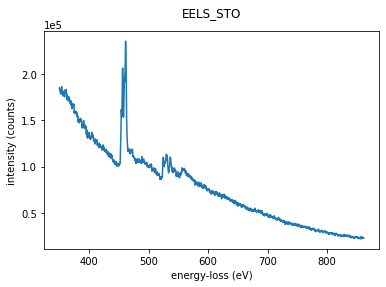

In [3]:
filename = "EELS_STO.dm3"

reader = DM3Reader(filename)
dataset = reader.read()

print(dataset)
dataset.plot()


## Let's look at sidpy dataset original metadata

All the information is saved.

In [25]:
dataset.view_original_metadata()

DM :
	file_version : 3
	file_size : 322611
	chosen_image : 1
	full_file_name : EELS_STO.dm3
ApplicationBounds : [0, 0, 1065, 1916]
DocumentObjectList :
	0 :
		AnnotationGroupList :
		AnnotationType : 20
		BackgroundColor : [-1, -1, -1]
		BackgroundMode : 2
		FillMode : 2
		ForegroundColor : [-1, 0, 0]
		HasBackground : False
		ImageDisplayInfo :
			BackgroundColor : [-5655, -5655, -5655]
			BackgroundOn : True
			CalibrationSliceId :
				0 : 0
			CaptionAttributes : 7
			CaptionColor : [0, 0, 0]
			CaptionFaceName : Lucida Sans Unicode
			CaptionOn : True
			CaptionSize : 10
			CursorOn : False
			CursorPosition : 0.0
			DimensionLabels :
				0 : 
			DynamicContrast : True
			FrameOn : True
			GridColor : [0, -1, -1]
			GridOn : True
			GroupId : 0
			GroupList :
				0 :
					DoAutoSurveyHigh : True
					DoAutoSurveyLow : True
					GroupToDisplay :
						Offset : [-0.0, -0.0]
						Scale : [0.00048828125, 4.16666489400086e-06]
					TrackStyleX : 0
					TrackStyleY : 0
			LegendOn : Fal

## Write to disk

> At this point pyNSID is running behind sipy version. New compatible version comes soon.



In [5]:
hf = h5py.File(filename[:-3]+"hf5", 'a') 

hf.create_group('Measurement_000/Channel_000')
## Compatibility to OLD pyNSID version
dataset.axes = dataset._axes
dataset.original_metadata = ft.flatten_dict(dataset.original_metadata)
dataset.attrs = {}
nsid.hdf_io.write_nsid_dataset(dataset, hf['Measurement_000/Channel_000'], main_data_name=filename[:-4])
hf.close()

<HDF5 group "/Measurement_000/Channel_000" (0 members)> EELS_STO


## And now we load it again

> We will first open the file 

In [6]:
hdf5_file = h5py.File(filename[:-3]+"hf5", 'r+')
print(hdf5_file["Measurement_000"].keys())

<KeysViewHDF5 ['Channel_000']>


We really do normally not care about the underlying structure as the NSID reader is taking care of everything.

The NSID reader will return a sidpy dataset, which we then can plot, analyze, modify, and write back to the h5py file in pyNSID format.

We can read all of them or just a specific `directory` in this hirachical data file (hdf).

In [7]:

nsid_reader = NSIDReader(hdf5_file['Measurement_000/Channel_000'])
sidpy_dataset = nsid_reader.read()[0]
print(sidpy_dataset)
sidpy_dataset

sidpy.Dataset of type SPECTRUM with:
 dask.array<generic, shape=(2048,), dtype=float32, chunksize=(2048,), chunktype=numpy.ndarray>
 data contains: intensity (counts)
 and Dimensions: 
  energy_loss:  energy-loss (eV) of size (2048,)
 with metadata: ['DIMENSION_LABELS', 'DIMENSION_LIST', 'data_type', 'main_data_name', 'modality', 'nsid_version', 'quantity', 'source', 'units']


sidpy.Dataset of type SPECTRUM with:
 dask.array<generic, shape=(2048,), dtype=float32, chunksize=(2048,), chunktype=numpy.ndarray>
 data contains: intensity (counts)
 and Dimensions: 
  energy_loss:  energy-loss (eV) of size (2048,)
 with metadata: ['DIMENSION_LABELS', 'DIMENSION_LIST', 'data_type', 'main_data_name', 'modality', 'nsid_version', 'quantity', 'source', 'units']

## Exploration the structure of the pyNSID data format

We will use a sidpy function to plot the tree of the hdf5 file.

In [8]:
sidpy.hdf_utils.print_tree(hdf5_file)

/
├ Measurement_000
  ---------------
  ├ Channel_000
    -----------
    ├ EELS_STO
    ├ energy_loss
    ├ original_metadata
      -----------------


As a suggested convention we use Measurement_000 as the first directory to store different datasets that belong together. So ``Measurement_000`` is a ``h5py.Group``. Which contains several other ``h5py.Group``s which all start with ``Channel_``.

All directories are numbered and there is a function to automatically increase this number for convenience.

The different ``Channels`` could be for example reference data, simulataneaously acquired datasets.

The results would be logged with each individual dataset in its channel.

The names of directories of results should start with `Log_` or `Result_`.


### Dimensions of a dataset

A ``h5py.Dataset`` can have the dimensions ``attached`` to the dataset. 
The `attributes` of the dataset has actually the dimension labels stored and those dimensions are datasets in the same ``Directory``.

In the list of attributes of the main dataset we can see that a few other mandatorty items of a sidpy datasets (like: data_type) are stored.


In [9]:
for k, v in (hdf5_file['Measurement_000/Channel_000/EELS_STO'].attrs).items():
    print("{}: {}".format(k, v))

DIMENSION_LABELS: [b'energy_loss']
DIMENSION_LIST: [array([<HDF5 object reference>], dtype=object)]
data_type: SPECTRUM
main_data_name: EELS_STO
modality: generic
nsid_version: 0.0.1
quantity: intensity
source: DM3Reader
units: counts


We see that ``['energy_loss']`` is  the only label of the Dimensions and this datasets is actually visible in the Channel.

The ``attributes`` of this dimensional ``h5py.Datasets`` contain the addtionional information required by ``pyNSID`` and ``sidpy`` in their attributes and (in captial letters) the information of the ``hdf5`` dimension. 

In [10]:
print(dict(hdf5_file['Measurement_000/Channel_000/energy_loss'].attrs))
print(sidpy_dataset.dim_0)
print(sidpy_dataset.energy_loss)

{'CLASS': b'DIMENSION_SCALE', 'NAME': b'energy_loss', 'REFERENCE_LIST': array([(<HDF5 object reference>, 0)],
      dtype={'names':['dataset','dimension'], 'formats':['O','<i4'], 'offsets':[0,8], 'itemsize':16}), 'dimension_type': 'SPECTRAL', 'name': 'energy_loss', 'nsid_version': '0.0.1', 'quantity': 'energy-loss', 'units': 'eV'}
energy_loss:  energy-loss (eV) of size (2048,)
energy_loss:  energy-loss (eV) of size (2048,)


## Summary
NSID data format is available through the pyNSID package. The format is an extension of the hdf5 format accessible through the h5py package. 
